#Carga y Exploración Inicial de Datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Cargar los datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
# Imprime las primeras filas de set de entrenamiento
print("Primeras filas:")
display(train_df.head())

Primeras filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Imprime todos los tipos de datos de las variables de set de entrenamiento
print("Todos los tipos de datos de las variebles:")
display(train_df.dtypes)

Todos los tipos de datos de las variebles:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# Imprime todos los valores nulos por columna del df
print("Cantidad de valores nulos por columna:")
display(train_df.isnull().sum())

Cantidad de valores nulos por columna:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Imprime la cantidad de valores únicos en cada columna del DataFrame.
print("Cantidad de valores únicos por columna:")
display(train_df.nunique())

Cantidad de valores únicos por columna:


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


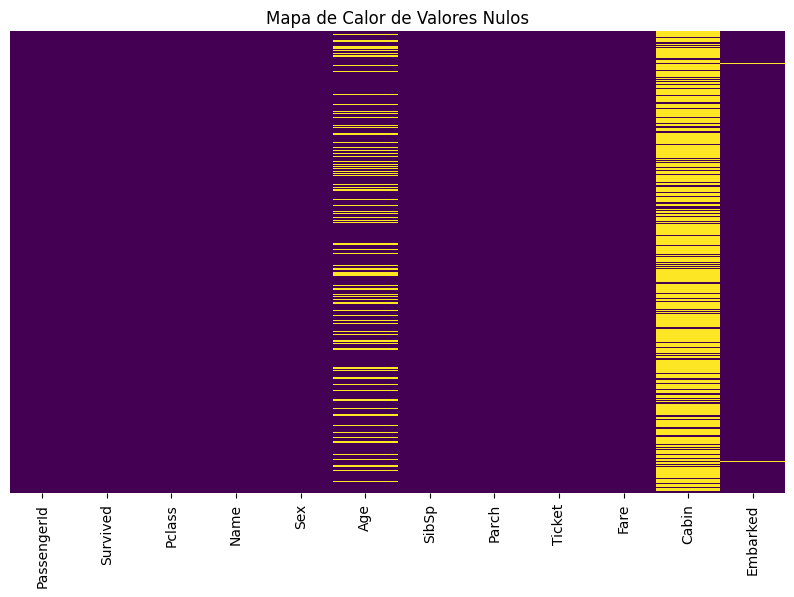

In [ ]:
# Visualizar los valores nulos en el df con un mapa de calor.
plt.figure(figsize=(10, 6))
# yticklabels=False elimina las etiquetas del eje Y para mayor claridad.
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa de Calor de Valores Nulos")
plt.show()

In [ ]:
# Imprime valores outliers
print("Valores outliers")
display(train_df.describe())

Valores outliers


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Selecciona solo columnas numericas
numeric_train_df = train_df.select_dtypes(include=np.number)
Q1 = numeric_train_df.quantile(0.25)
Q3 = numeric_train_df.quantile(0.75)
IQR = Q3 - Q1
# Definir límites de detección
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Ver cantidad de outliers por variable
outliers = ((numeric_train_df < limite_inferior) | (numeric_train_df > limite_superior)).sum()
print("Cantidad de outliers por variable:")
print(outliers)

Cantidad de outliers por variable:
PassengerId      0
Survived         0
Pclass           0
Age             11
SibSp           46
Parch          213
Fare           116
dtype: int64


#Análisis Exploratorio de Datos (EDA):

In [ ]:
# Calcular estadísticas para variables numéricas
print("Estadísticas descriptivas para Age:")
print(train_df['Age'].describe())
print("Estadísticas descriptivas para Fare:")
print(train_df['Fare'].describe())
# Calcular estadísticas para variables categoricas
print("\n Distribución de variables categóricas como Sex:")
print(train_df['Sex'].value_counts())
print("\n Distribución de variables categóricas como Pclass:")
print(train_df['Pclass'].value_counts())

Estadísticas descriptivas para Age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Estadísticas descriptivas para Fare:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

 Distribución de variables categóricas como Sex:
Sex
male      577
female    314
Name: count, dtype: int64

 Distribución de variables categóricas como Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


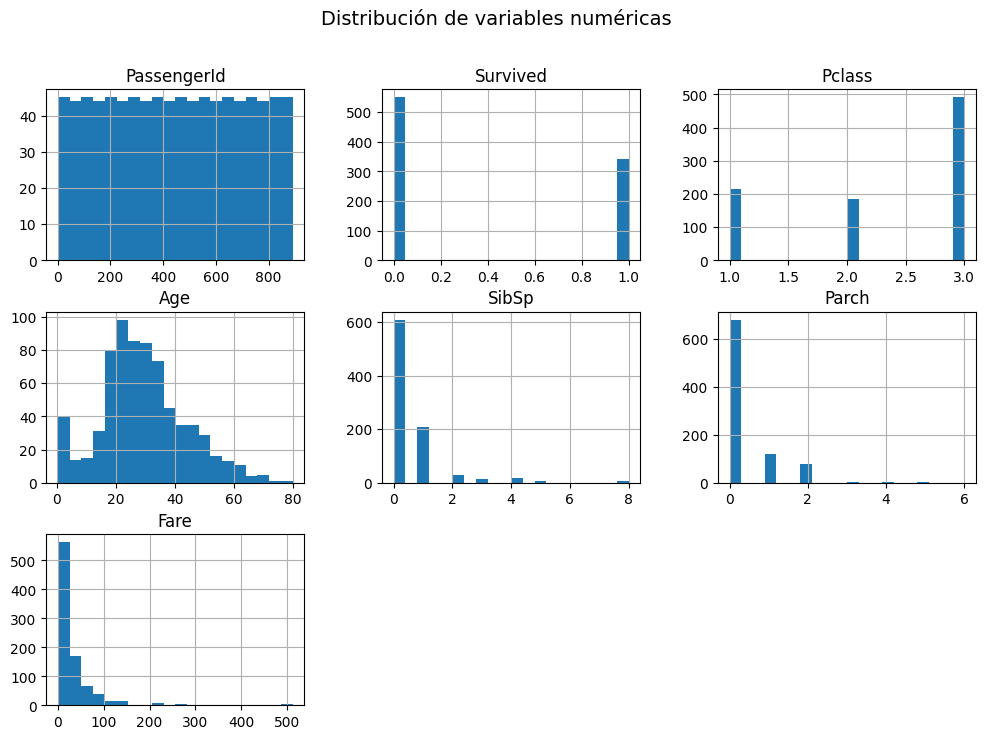

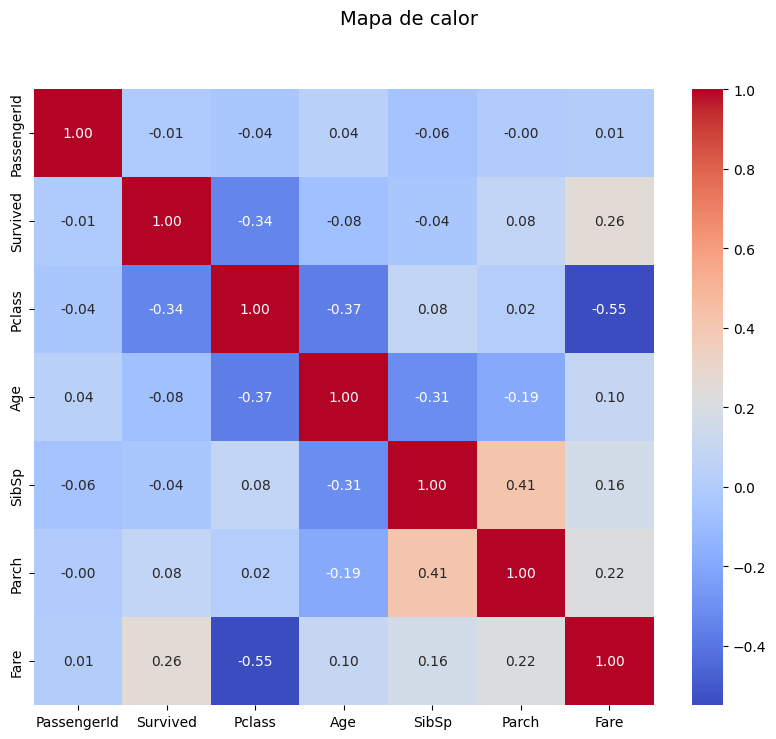

In [ ]:
numeric_features = train_df.select_dtypes(include=np.number).columns
# Histogramas para variables numéricas
# Se uso numeric_features para seleccionar solo las columnas numéricas del df
train_df[numeric_features].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()

# Mapa de calor para visualizar cómo se relacionan las variables entre sí
plt.figure(figsize=(10,8))
# Calcula correlacion para solamente columnas numericas
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.suptitle("Mapa de calor", fontsize=14)
plt.show()

Manejo de valores faltantes

In [ ]:
# Imputar 'Age' con la mediana (más robusto contra outliers)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
# Imputar 'Embarked' con el valor más frecuente (moda)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
# Eliminar la columna 'Cabin' por alto porcentaje de valores nulos
train_df.drop(columns=['Cabin'], inplace=True)

<ipython-input-32-98c7d89ee9fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-32-98c7d89ee9fa>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Manejo de Outliers

In [ ]:
# Definir función para eliminar outliers usando el rango intercuartil (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else lower_bound if x < lower_bound else upper_bound)

# Aplicar la función en variables con outliers
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    remove_outliers(train_df, col)

#Preprocesamiento de Datos:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar 'Sex' para que convierte Male/Female en 0 y 1
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
# Codificar 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

In [ ]:
#Escalado de Características Numéricas
scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

# Definir características (X) y variable objetivo (y)
# Definir características (X) y variable objetivo (y)
# Excluir columnas que no se usarán en el modelo y que contienen datos no numéricos
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_df['Survived']  # Variable objetivo
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (712, 8)
Tamaño del conjunto de prueba: (179, 8)


#Implementación de Modelos y Benchmark:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression())
    ]),

    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]),

    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier(max_depth=5))
    ]),

    "XGBoost": Pipeline([
        ("model", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
    ]),

    "LightGBM": Pipeline([
        ("model", LGBMClassifier())
    ])
}

results = {}

for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = scores.mean()  # Guardar la media de la precisión

# Mostrar resultados ordenados por rendimiento
import pandas as pd
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
print(results_df.sort_values(by="Accuracy", ascending=False))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RESULTADOS

Accuracy

LightGBM             0.827263

XGBoost              0.807614

Decision Tree        0.806185

K-Nearest Neighbors  0.789314

Logistic Regression  0.782242

In [ ]:
from sklearn.model_selection import cross_val_score
# Definir el número de folds
k_folds = 5
# Evaluar cada modelo con validación cruzada
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring="accuracy")  # Validación cruzada con 5 folds
    results[name] = {"Mean Accuracy": np.mean(scores), "Std Dev": np.std(scores)}  # Guardar promedio y desviación estándar

# Convertir resultados en DataFrame para mejor visualización
import pandas as pd
results_df = pd.DataFrame(results).T
# Mostrar resultados ordenados por rendimiento
print(results_df.sort_values(by="Mean Accuracy", ascending=False))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Mean Accuracy        ----        Std Dev

LightGBM     -------------             0.827263  0.012006

XGBoost           ---------------        0.807614  0.014067

Decision Tree         --------    0.804777  0.014992

K-Nearest Neighbors   ---------    0.789314  0.020999

Logistic Regression    -----------   0.782242  0.021452

Optimizar los hiperparámetros de los modelos seleccionados utilizando RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression())
    ]),

    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]),

    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier(max_depth=5))
    ]),

    "XGBoost": Pipeline([
        ("model", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
    ]),

    "LightGBM": Pipeline([
        ("model", LGBMClassifier())
    ])
}

In [ ]:
param_distributions = {
    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1, 10]  # Regularización
    },
    "K-Nearest Neighbors": {
        "model__n_neighbors": [3, 5, 7, 9],  # Número de vecinos
        "model__weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "model__max_depth": [3, 5, 7, 10],
        "model__min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "model__max_depth": [3, 5, 7],
        "model__learning_rate": [0.01, 0.1, 0.3],
        "model__n_estimators": [50, 100, 200]
    },
    "LightGBM": {
        "model__num_leaves": [15, 31, 50],
        "model__learning_rate": [0.01, 0.1, 0.3],
        "model__n_estimators": [50, 100, 200]
    }
}

In [ ]:
best_models = {}

for name, params in param_distributions.items():
    # Obtén el pipeline directamente del diccionario models
    pipeline = models[name]
    random_search = RandomizedSearchCV(pipeline, param_distributions=params, cv=5, scoring="accuracy", n_jobs=-1, n_iter=10)
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_

    print(f"Mejor configuración para {name}: {random_search.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor configuración para Logistic Regression: {'model__C': 0.01}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor configuración para K-Nearest Neighbors: {'model__weights': 'uniform', 'model__n_neighbors': 9}
Mejor configuración para Decision Tree: {'model__min_samples_split': 2, 'model__max_depth': 3}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:30:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejor configuración para XGBoost: {'model__n_estimators': 50, 'model__max_depth': 3, 'model__learning_rate': 0.1}
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

**RESULTADO**

Mejor configuración para LightGBM: {'model__num_leaves': 31, 'model__n_estimators': 100, 'model__learning_rate': 0.1}

In [ ]:
from sklearn.metrics import accuracy_score

results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Mostrar los resultados ordenados
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
print(results_df.sort_values(by="Accuracy", ascending=False))

                     Accuracy
LightGBM             0.843575
XGBoost              0.821229
K-Nearest Neighbors  0.810056
Decision Tree        0.798883
Logistic Regression  0.793296


Comparar el rendimiento de los modelos

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Evaluar modelos optimizados
results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    results[name] = {"Accuracy": accuracy, "AUC-ROC": auc_roc, "F1-Score": f1}

# Convertir resultados a DataFrame y mostrar ordenados por AUC-ROC
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="AUC-ROC", ascending=False))

                     Accuracy   AUC-ROC  F1-Score
K-Nearest Neighbors  0.810056  0.893308  0.760563
LightGBM             0.843575  0.889704  0.805556
XGBoost              0.821229  0.881982  0.764706
Logistic Regression  0.793296  0.877735  0.729927
Decision Tree        0.798883  0.846332  0.739130


- LightGBM es el mejor modelo en precisión (Accuracy) con un 84.36% de aciertos. También tiene un buen F1-Score (80.56%), lo que indica que equilibra bien la precisión y el recall.

- K-Nearest Neighbors tiene el mejor AUC-ROC (0.8933), lo que significa que discrimina mejor entre clases.

- XGBoost estya cercano a LightGBM y KNN, con buen equilibrio entre las métricas.

- Regresión Logística y Árbol de Decisión son los menos efectivos.